# Experiment 12: Implement crisp partitions for real-life iris dataset.

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [5]:
X = iris.iloc[:, :-1].values

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [7]:
y_kmeans = kmeans.fit_predict(X)

In [8]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

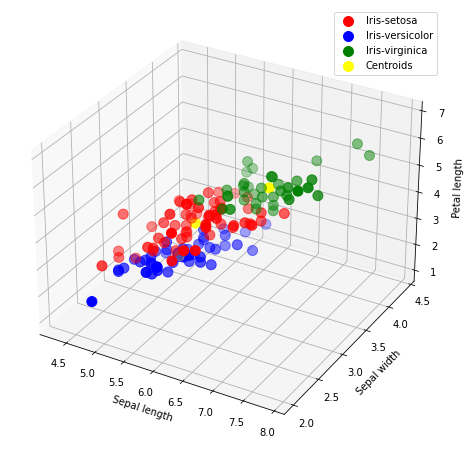

In [9]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Iris-setosa')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Iris-versicolor')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Iris-virginica')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.legend()
plt.show()

# Experiment 13: Implement a fuzzy linguistic hedge system to determine the recommended tip amount in a restaurant based on the quality of service and the quality of food. Define fuzzy sets and membership functions for input and output variables, set rules for fuzzy inference systems, and visualize the results.

In [10]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=22137a88dbe66344f57166bd9866d1dbbd4e6673b5939f87c0498eae54a5564c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [12]:
from skfuzzy.control.controlsystem import Antecedent
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')

In [13]:
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [14]:
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['good'] = fuzz.trimf(service.universe, [0, 5, 10])
service['excellent'] = fuzz.trimf(service.universe, [5, 10, 10])

In [15]:
food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['good'] = fuzz.trimf(food.universe, [0, 5, 10])
food['excellent'] = fuzz.trimf(food.universe, [5, 10, 10])

In [16]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

In [17]:
rule1 = ctrl.Rule(service['poor'] | food['poor'], tip['low'])
rule2 = ctrl.Rule(service['good'], tip['medium'])
rule3 = ctrl.Rule(service['excellent'] | food['excellent'], tip['high'])
rule4 = ctrl.Rule(service['good'] | food['good'], tip['medium'])

In [18]:
tip_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
tip_amount = ctrl.ControlSystemSimulation(tip_ctrl)

In [19]:
tip_amount.input['service'] = 9.8
tip_amount.input['food'] = 7.6

In [20]:
tip_amount.compute()

In [21]:
print("The recommended tip amount is:", tip_amount.output['tip'], "percent")

The recommended tip amount is: 15.175800530130552 percent


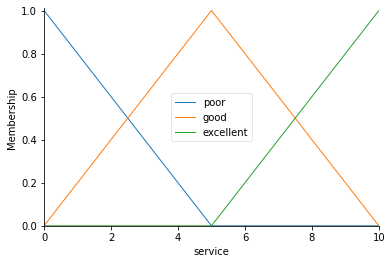

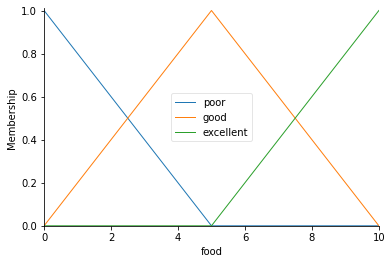

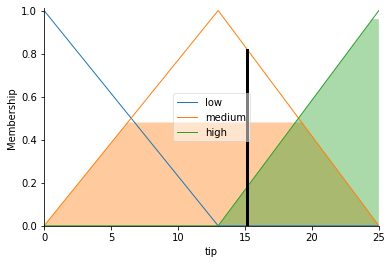

In [22]:
service.view()
food.view()
tip.view(sim = tip_amount)